# 1872-2018年 足球世界杯赛事数据分析

此数据集大致有4万场国际足球赛事的结果,包括世界杯正赛、预选赛、亚洲杯、欧洲杯、国家之间的友谊赛等. 数据来源:kaggle.com

## 项目流程：

1、 筛选出世界杯所有正赛的数据,并进行数据清洗     
2、 筛选出比赛前20强数据情况  
2.1 获取世界杯所有比赛获胜场数最多的前20强数据  
2.2 各个国家队进球总数情况  
3、对2018年世界杯32强分析（自2002年以来，32强数据情况）  
4、综合结论  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
plt.style.use('ggplot')

In [2]:
file_path='data/data.csv'
df = pd.read_csv(file_path,encoding='utf-8')  # ISO-8859-1
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


数据集中所包含字段: 日期,主队名称,客队名称,主队进球数,客队进球数,比赛类型,所在城市,所在国家,是否中立

### 1、 获取世界杯所有正赛的数据


我们需要将世界杯正赛的数据从总的数据集中筛选出来  
紧接着我们将会进行数据清洗,把日期列的格式转换为datetime,并根据原有数据新增一些字段：净胜球,获胜球队名,比赛所在年份

In [3]:
# df['tournament'].value_counts() 我们需要将世界杯赛事的数据从总的国际各项足球赛事数据集中筛选出来

In [4]:
df_FIFA_total = df[df['tournament'].str.contains('FIFA')]

In [5]:
df_FIFA_total['tournament'].value_counts()

FIFA World Cup qualification    7100
FIFA World Cup                   836
Name: tournament, dtype: int64

In [6]:
df_FIFA = df_FIFA_total[df_FIFA_total['tournament']=='FIFA World Cup']
df_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 1277 to 35597
Data columns (total 9 columns):
date          836 non-null object
home_team     836 non-null object
away_team     836 non-null object
home_score    836 non-null int64
away_score    836 non-null int64
tournament    836 non-null object
city          836 non-null object
country       836 non-null object
neutral       836 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 59.6+ KB


In [7]:
df_FIFA.loc[:,'date']= pd.to_datetime(df_FIFA['date'])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
df_FIFA.loc[:,'year'] = df_FIFA['date'].dt.year

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [9]:
df_FIFA['year'].value_counts()

2014    64
2010    64
2006    64
2002    64
1998    64
1994    52
1990    52
1986    52
1982    52
1974    38
1978    38
1958    35
1970    32
1966    32
1962    32
1954    26
1950    22
1938    18
1930    18
1934    17
Name: year, dtype: int64

In [10]:
df_FIFA.loc[:,'diff_score'] = df_FIFA['home_score']-df_FIFA['away_score']

In [11]:
df_FIFA.loc[df_FIFA['diff_score']> 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score']> 0, 'home_team']
df_FIFA.loc[df_FIFA['diff_score']< 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score']< 0, 'away_team']
df_FIFA.loc[df_FIFA['diff_score']== 0, 'win_team'] = 'Draw'

In [12]:
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina


### 筛选出比赛前20强数据情况

In [43]:
winning_teams = df_FIFA.groupby('win_team')['date'].count()
winning_teams.sort_values(ascending=False,inplace=True)
winning_teams

win_team
Draw                  186
Brazil                 70
Germany                66
Italy                  45
Argentina              42
Spain                  29
France                 28
Netherlands            27
England                26
Uruguay                20
Russia                 17
Sweden                 16
Hungary                15
Poland                 15
Belgium                14
Mexico                 14
Yugoslavia             14
Portugal               13
Austria                12
Switzerland            11
Czechoslovakia         11
Chile                  11
Romania                 8
USA                     8
Denmark                 8
Colombia                7
Paraguay                7
Croatia                 7
Nigeria                 5
Korea Republic          5
                     ... 
Cameroon                4
Ghana                   4
Japan                   4
Scotland                4
Peru                    4
Algeria                 3
Northern Ireland        3
Ser

删掉第一项draw后,我们将数据以条形图的形式呈现出来

In [44]:
# winning_teams.items   
data = winning_teams[1:20]

Text(0, 0.5, 'Counts')

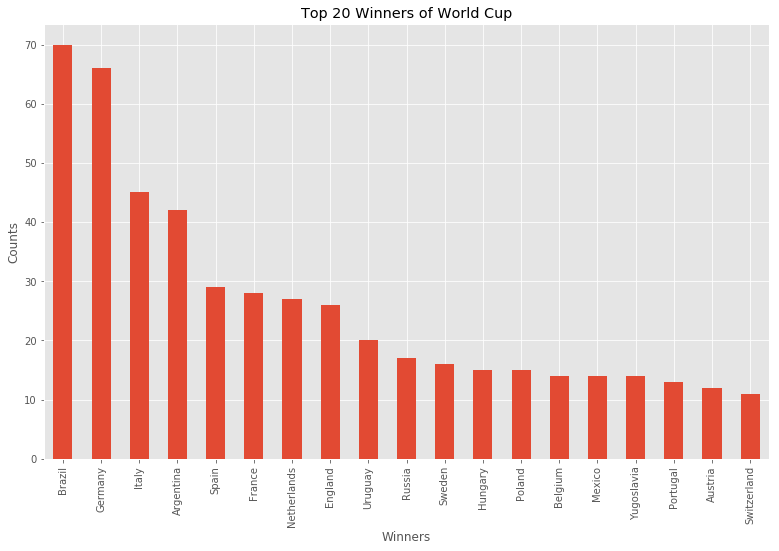

In [45]:
data.plot(kind='bar', figsize=(13,8), title='Top 20 Winners of World Cup')
plt.xlabel('Winners')
plt.ylabel('Counts')

Text(0, 0.5, 'Winners')

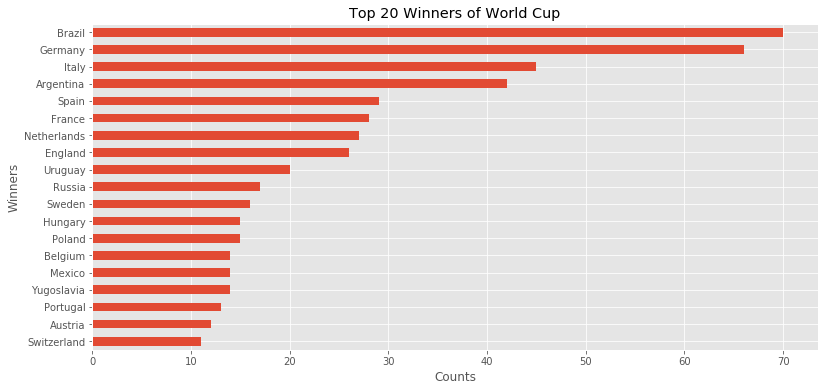

In [46]:
data.sort_values(ascending=True,inplace=True)
data.plot(kind='barh', figsize=(13,6), title='Top 20 Winners of World Cup')
plt.xlabel('Counts')
plt.ylabel('Winners')

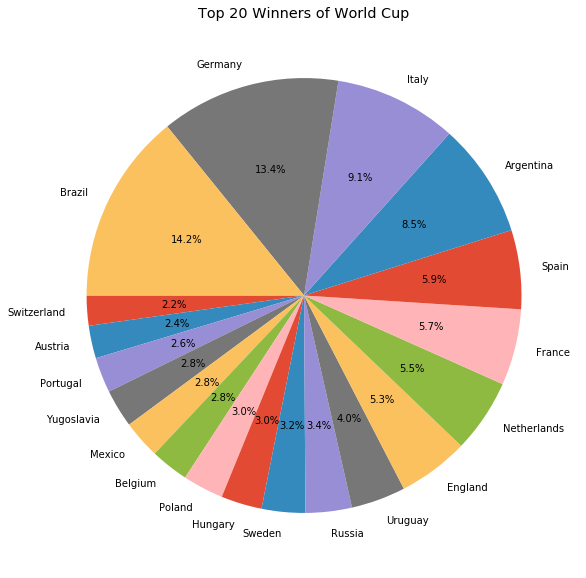

In [56]:
data.plot(kind='pie', figsize=(10,10), autopct='%.1f%%', 
                           startangle=180, title='Top 20 Winners of World Cup',label='')

#### 分析结论1： 从赢球场数来看，巴西、德国、意大利、阿根廷四支球队实力最强

### 各个国家队进球总数情况

In [62]:
df_score_home = df_FIFA[['home_team', 'home_score']]
column_update = ['team', 'score']
df_score_home.columns = column_update

In [63]:
df_score_away = df_FIFA[['away_team', 'away_score']]
column_update = ['team', 'score']
df_score_away.columns = column_update

In [69]:
df_score_total= df_score_home.append(df_score_away)

In [73]:
df_score = df_score_total.groupby('team')['score'].sum().sort_values(ascending=False) 

In [74]:
df_score

team
Germany                 224
Brazil                  221
Argentina               131
Italy                   128
France                  106
Spain                    92
Hungary                  87
Netherlands              86
Uruguay                  80
England                  79
Sweden                   74
Russia                   66
Mexico                   57
Yugoslavia               55
Belgium                  52
Switzerland              45
Czechoslovakia           44
Poland                   44
Portugal                 43
Austria                  43
Chile                    40
USA                      37
Korea Republic           31
Romania                  30
Paraguay                 30
Denmark                  27
Colombia                 26
Scotland                 25
Bulgaria                 22
Croatia                  21
                       ... 
Iran                      7
Norway                    7
Korea DPR                 6
Ukraine                   5
Cuba           

In [77]:
data = df_score[0:20][::-1]

Text(0, 0.5, 'Teams')

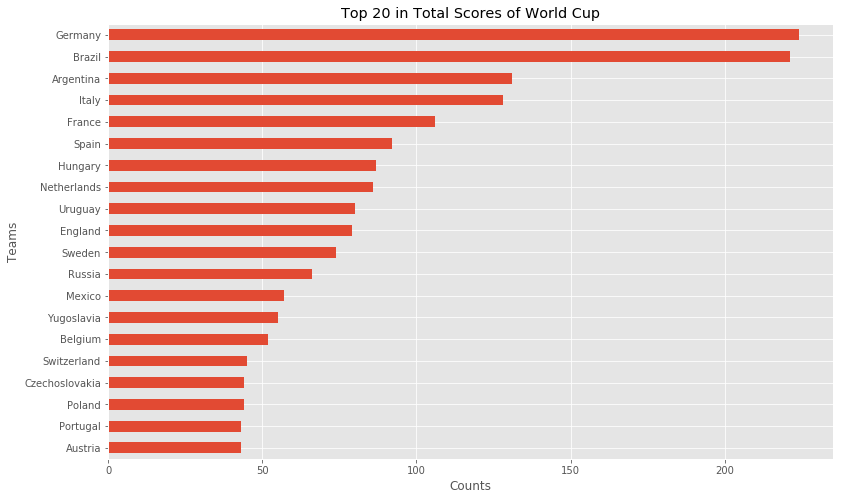

In [80]:
data.plot(kind='barh', figsize=(13,8), title='Top 20 in Total Scores of World Cup')
plt.xlabel('Counts')
plt.ylabel('Teams')

#### 分析结论2： 从进球总数量来看，德国、巴西、阿根廷、意大利四支球实力最强

## 2018年世界杯32强在最近4届世界杯的表现

第一组：俄罗斯、德国、巴西、葡萄牙、阿根廷、比利时、波兰、法国

第二组：西班牙、秘鲁、瑞士、英格兰、哥伦比亚、墨西哥、乌拉圭、克罗地亚

第三组：丹麦、冰岛、哥斯达黎加、瑞典、突尼斯、埃及、塞内加尔、伊朗

第四组：塞尔维亚、尼日利亚、澳大利亚、日本、摩洛哥、巴拿马、韩国、沙特阿拉伯

In [81]:
team_list = ['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France', 
             'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',
            'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',
            'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']

In [88]:
df_top32 = df_FIFA[(df_FIFA['home_team'].isin(team_list))&(df_FIFA['away_team'].isin(team_list))]
df_top32.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina
1286,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1930,1,Uruguay
1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1930,3,Argentina
1296,1930-07-30,Uruguay,Argentina,4,2,FIFA World Cup,Montevideo,Uruguay,False,1930,2,Uruguay


In [89]:
df_top32_2002 = df_top32[df_top32['year']>=2002]

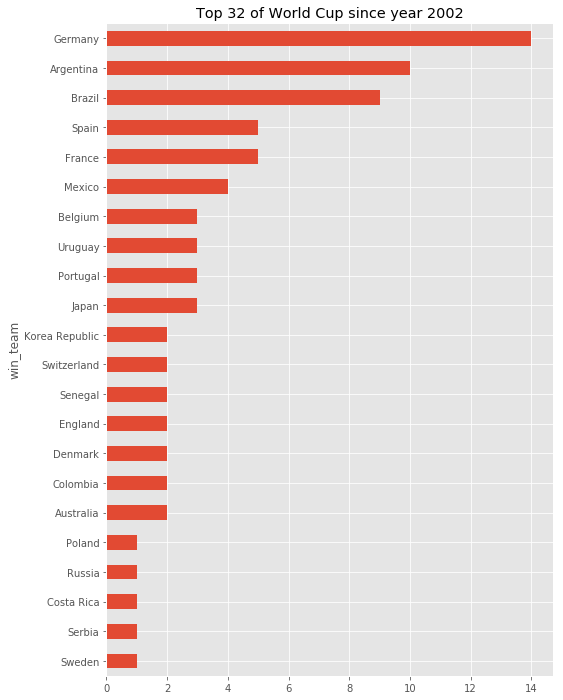

In [94]:
data = df_top32_2002.groupby('win_team')['win_team'].count()
data.drop(labels=['Draw'], inplace=True)
data.sort_values(ascending=True,inplace=True)
data.plot(kind='barh', figsize=(8,12), title='Top 32 of World Cup since year 2002')

In [95]:
df_score_home_32_2002 = df_top32_2002[['home_team', 'home_score']]
column_update = ['team', 'score']
df_score_home_32_2002.columns = column_update
df_score_away_32_2002 = df_top32_2002[['away_team', 'away_score']]
df_score_away_32_2002.columns = column_update
df_score_32_2002 = pd.concat([df_score_home_32_2002,df_score_away_32_2002], ignore_index=True)
s_score_32_2002 = df_score_32_2002.groupby('team')['score'].sum()
s_score_32_2002.sort_values(ascending=False, inplace=True)
s_score_32_2002.head()

team
Germany      48
Argentina    25
Brazil       24
France       13
Mexico       12
Name: score, dtype: int64

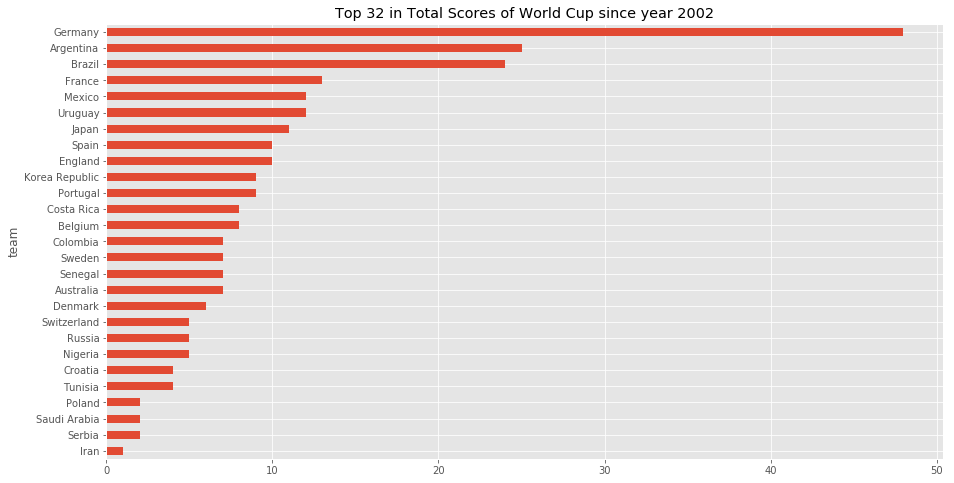

In [102]:
s_score_32_2002.sort_values(ascending=True, inplace=True)
s_score_32_2002.plot(kind='barh', figsize=(15,8), title='Top 32 in Total Scores of World Cup since year 2002')

#### 分析结论3： 自2002年以来，32强之间的世界杯比赛，从赢球场数和进球数量来看，德国、阿根廷、巴西三支球队实力最强。其中，德国队的数据优势更明显。